# 01_SIMBA_scRNAseq_spatialLIBD

Dataset: https://research.libd.org/spatialLIBD/

In [4]:
%load_ext autoreload
%autoreload 2

In [47]:
import scanpy as sc

In [1]:
import os
import simba as si
si.__version__

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_si

'1.2'

In [2]:
workdir = 'result_simba_rnaseq_spatialLIBD'
si.settings.set_workdir(workdir)

Saving results in: result_simba_rnaseq_spatialLIBD


In [49]:
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

In [50]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load data

Got pre-processed data from Zhijian (dropbox)

In [65]:
h5_fn = "./result_simba_rnaseq_spatialLIBD/data/151673.h5ad"

In [66]:
adata_CG = sc.read_h5ad(h5_fn)
adata_CG

AnnData object with n_obs × n_vars = 3611 × 16578
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'spatialLIBD', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [67]:
adata_CG.obs['spatialLIBD']

AAACAAGTATCTCCCA-1    L3
AAACAATCTACTAGCA-1    L1
AAACACCAATAACTGC-1    WM
AAACAGAGCGACTCCT-1    L3
AAACAGCTTTCAGAAG-1    L5
                      ..
TTGTTTCACATCCAGG-1    WM
TTGTTTCATTAGTCTA-1    WM
TTGTTTCCATACAACT-1    L6
TTGTTTGTATTACACG-1    WM
TTGTTTGTGTAAATTC-1    L2
Name: spatialLIBD, Length: 3611, dtype: category
Categories (7, object): ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'WM']

In [68]:
si.pp.cal_qc_rna(adata_CG)

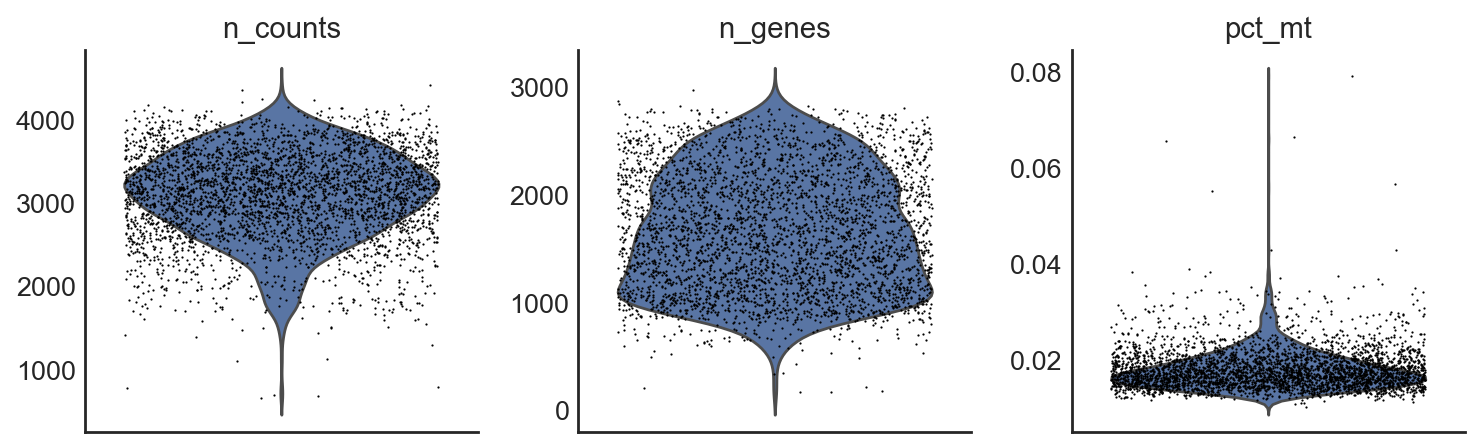

In [69]:
si.pl.violin(adata_CG,list_obs=['n_counts','n_genes','pct_mt'])

Already looks normalized and log transformed

# Discretize RNA counts

Set the number of bins manually?

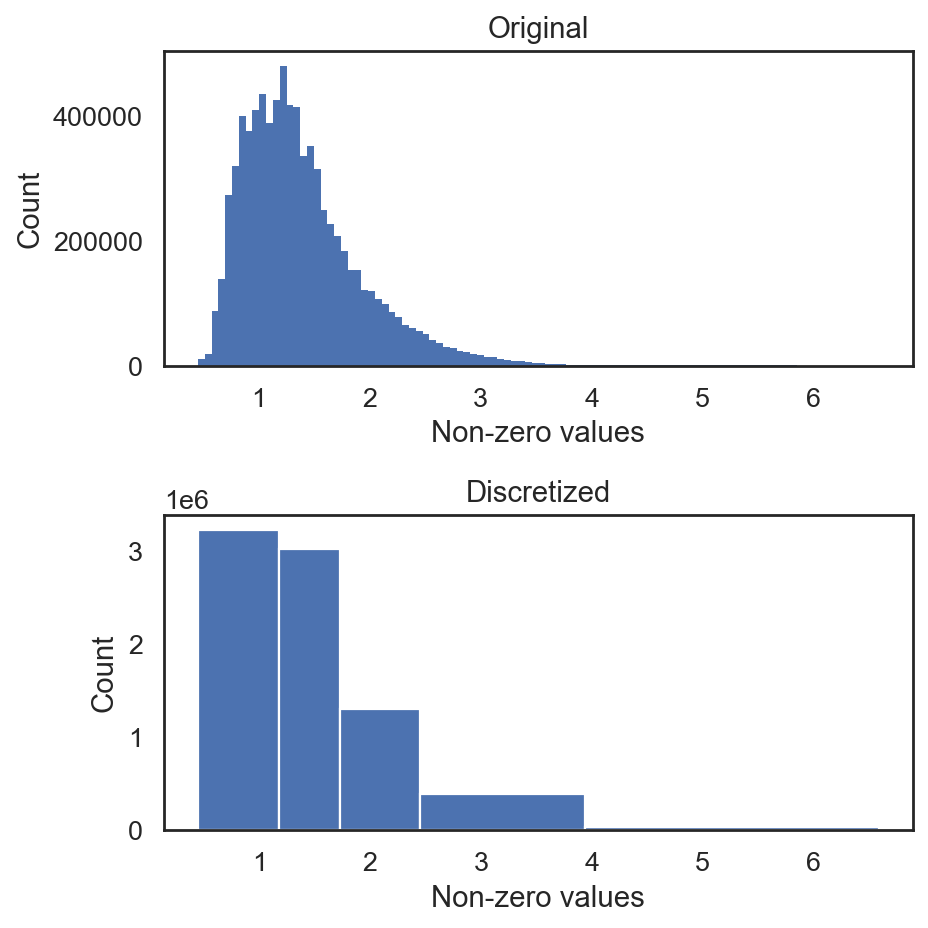

In [70]:
si.tl.discretize(adata_CG,n_bins=5)
si.pl.discretize(adata_CG,kde=False)

In [72]:
adata_CG.layers

Layers with keys: counts, simba

# Generate graph

In [73]:
si.tl.gen_graph(
    list_CG=[adata_CG],
    layer='simba',
    use_highly_variable=False, 
    dirname='graph0'
)

relation0: source: C, destination: G
#edges: 3219964
relation1: source: C, destination: G
#edges: 3011006
relation2: source: C, destination: G
#edges: 1298252
relation3: source: C, destination: G
#edges: 390354
relation4: source: C, destination: G
#edges: 36477
Total number of edges: 7956053
Writing graph file "pbg_graph.txt" to "result_simba_rnaseq_spatialLIBD/pbg/graph0" ...
Finished.


In [74]:
# si.settings.pbg_params, may need to adjust training parameters

In [75]:
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')

Auto-estimating weight decay ...
`.settings.pbg_params['wd']` has been updated to 0.004454
Weight decay being used for training is 0.004454
Converting input data ...
[2025-01-07 16:30:26.535119] Using the 5 relation types given in the config
[2025-01-07 16:30:26.536032] Searching for the entities in the edge files...
[2025-01-07 16:30:33.146210] Entity type C:
[2025-01-07 16:30:33.147006] - Found 3611 entities
[2025-01-07 16:30:33.147536] - Removing the ones with fewer than 1 occurrences...
[2025-01-07 16:30:33.149430] - Left with 3611 entities
[2025-01-07 16:30:33.150427] - Shuffling them...
[2025-01-07 16:30:33.152810] Entity type G:
[2025-01-07 16:30:33.154184] - Found 16578 entities
[2025-01-07 16:30:33.155286] - Removing the ones with fewer than 1 occurrences...
[2025-01-07 16:30:33.158672] - Left with 16578 entities
[2025-01-07 16:30:33.159532] - Shuffling them...
[2025-01-07 16:30:33.166948] Preparing counts and dictionaries for entities and relation types:
[2025-01-07 16:30:33.

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:


[2025-01-07 16:31:02.384375] - Processed 7956053 edges in total
Starting training ...


/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/torchbiggraph/tensorlist.py:86: UserWarning: T

Finished


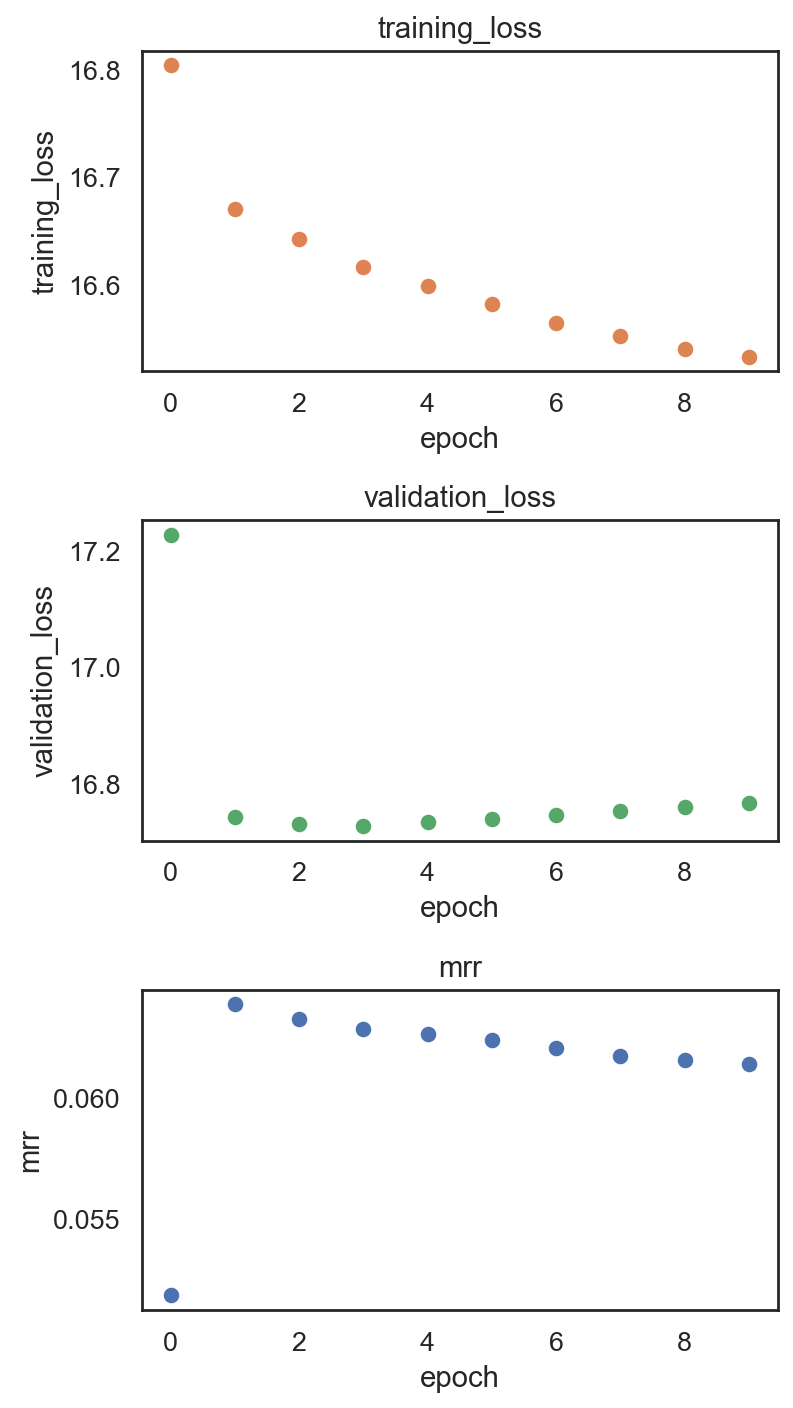

In [76]:
si.pl.pbg_metrics(fig_ncol=1)

# Post-training analysis

In [77]:
# read in entity embeddings obtained from pbg training.
dict_adata = si.read_embedding()
dict_adata

{'G': AnnData object with n_obs × n_vars = 16578 × 50,
 'C': AnnData object with n_obs × n_vars = 3611 × 50}

In [78]:
adata_C = dict_adata['C']  # embeddings of cells
adata_G = dict_adata['G']  # embeddings of genes

In [82]:
adata_C.obs['spatialLIBD'] = adata_CG[adata_C.obs_names,:].obs['spatialLIBD'].copy()
adata_C

AnnData object with n_obs × n_vars = 3611 × 50
    obs: 'spatialLIBD'

In [83]:
adata_C.obs['spatialLIBD'].value_counts()

spatialLIBD
L3    989
L6    692
L5    673
WM    513
L1    273
L2    253
L4    218
Name: count, dtype: int64

In [86]:
# approximate original figure in http://spatial.libd.org/spatialLIBD/
palette_celltype={'L1':'#eb34a8',
                  'L2':'#3486eb',
                  'L3':'#34eb5b',
                  'L4':"#ae34eb",
                  'L5':'#ebdb34',
                  'L6':'#eb9234',
                  'WM':'#000000'}

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


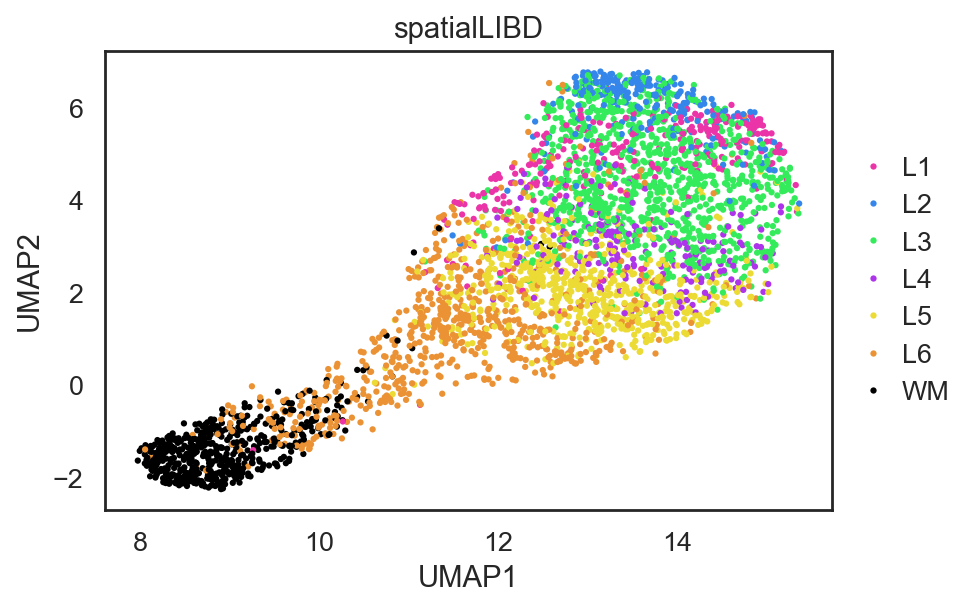

In [85]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)
si.pl.umap(
    adata_C,color=['spatialLIBD'],
    dict_palette={'spatialLIBD': palette_celltype},
    fig_size=(6,4),
    drawing_order='random'
)

# Visualize cell and gene embeddings

In [87]:
# embed cells and genes into the same space
adata_all = si.tl.embed(adata_ref=adata_C,list_adata_query=[adata_G])
adata_all.obs.head()

Performing softmax transformation for query data 0;


,spatialLIBD,id_dataset
AGTCTTCTCCTCAAAT-1,L5,ref
GACTGGGCGCCGCAAC-1,L3,ref
ACATCCCGGCCATACG-1,L6,ref
ATAAGTAGGATTCAGA-1,L3,ref
GATGGTGCCCTAGGCA-1,L3,ref


In [88]:
## add annotations of cells and genes
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'spatialLIBD']
adata_all.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'
adata_all.obs.head()

,spatialLIBD,id_dataset,entity_anno
AGTCTTCTCCTCAAAT-1,L5,ref,L5
GACTGGGCGCCGCAAC-1,L3,ref,L3
ACATCCCGGCCATACG-1,L6,ref,L6
ATAAGTAGGATTCAGA-1,L3,ref,L3
GATGGTGCCCTAGGCA-1,L3,ref,L3


In [96]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()


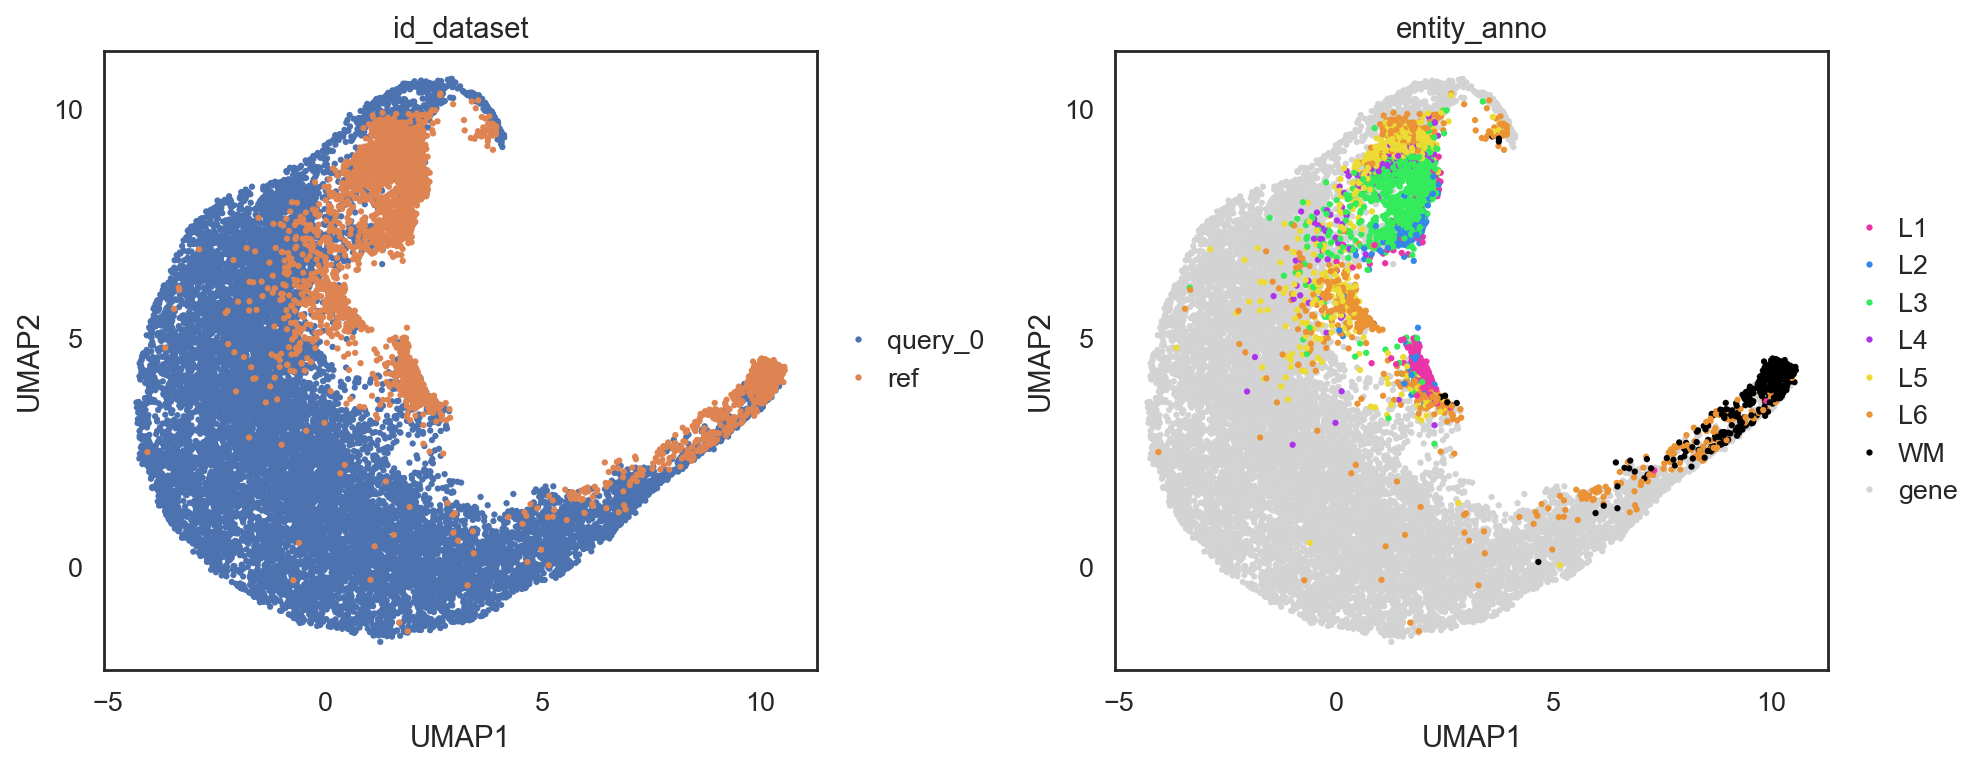

In [97]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)
si.pl.umap(adata_all[::-1,],color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           fig_size=(6,5))

# Marker discovoery

In [92]:
adata_cmp = si.tl.compare_entities(adata_ref=adata_C, adata_query=adata_G)
adata_cmp

AnnData object with n_obs × n_vars = 3611 × 16578
    obs: 'spatialLIBD'
    var: 'max', 'std', 'gini', 'entropy'
    layers: 'norm', 'softmax'

In [98]:
adata_cmp.var.sort_values(by='max', ascending=False).head(20)

,max,std,gini,entropy
DNAH17,2.074397,0.859503,0.553902,7.552888
GJB1,2.010231,0.881203,0.560887,7.545230
AL359091.1,2.008633,0.907515,0.572714,7.520928
FOLH1,1.991947,0.922339,0.578864,7.514150
LRP2,1.990726,0.853090,0.543200,7.593719
SLC5A11,1.990442,0.850515,0.544673,7.576201
S1PR5,1.979053,0.853131,0.540535,7.607524
GLDN,1.969823,0.909695,0.569374,7.541162
CDKN1C,1.961797,0.829214,0.527431,7.627686
ABCA8,1.960374,0.819658,0.522659,7.643043


/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/simba/plotting/_post_training.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt_texts = [plt.text(adata_cmp.var[x][i],
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/simba/plotting/_post_training.py:257: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata_cmp.var[y][i],
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


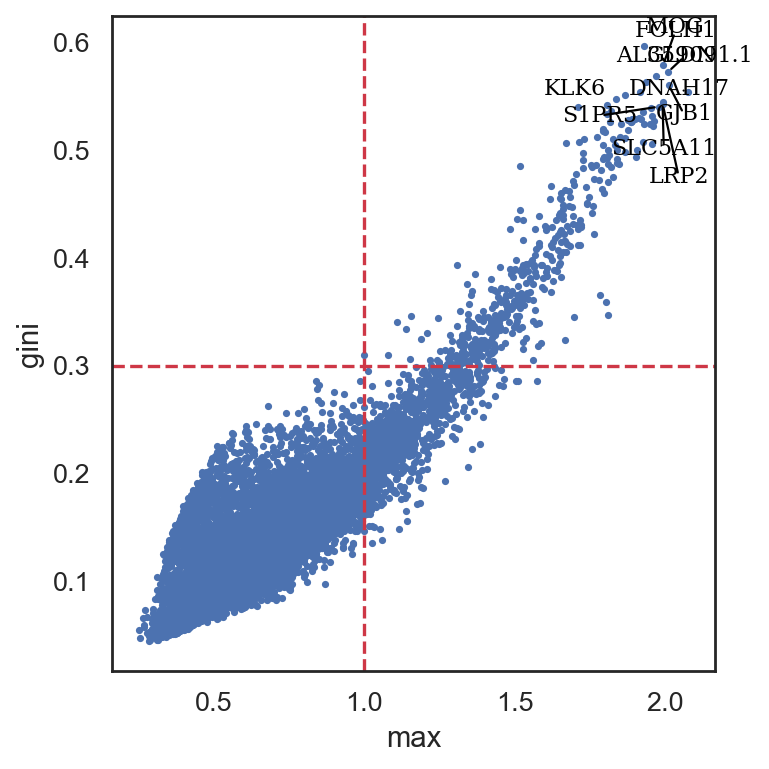

In [95]:
# SIMBA metrics can be visualized using the following function:
si.pl.entity_metrics(adata_cmp,
                     x='max',
                     y='gini',
                     show_contour=False,
                     # texts=marker_genes + ['GAPDH', 'B2M'],
                     show_texts=True,
                     show_cutoff=True,
                     size=5,
                     text_expand=(1.3,1.5),
                     cutoff_x=1.,
                     cutoff_y=0.3,
                     save_fig=False)

# Barcode plots

In [102]:
list_genes = adata_cmp.var.sort_values(by='max', ascending=False).head(3).index.tolist()
list_genes

['DNAH17', 'GJB1', 'AL359091.1']

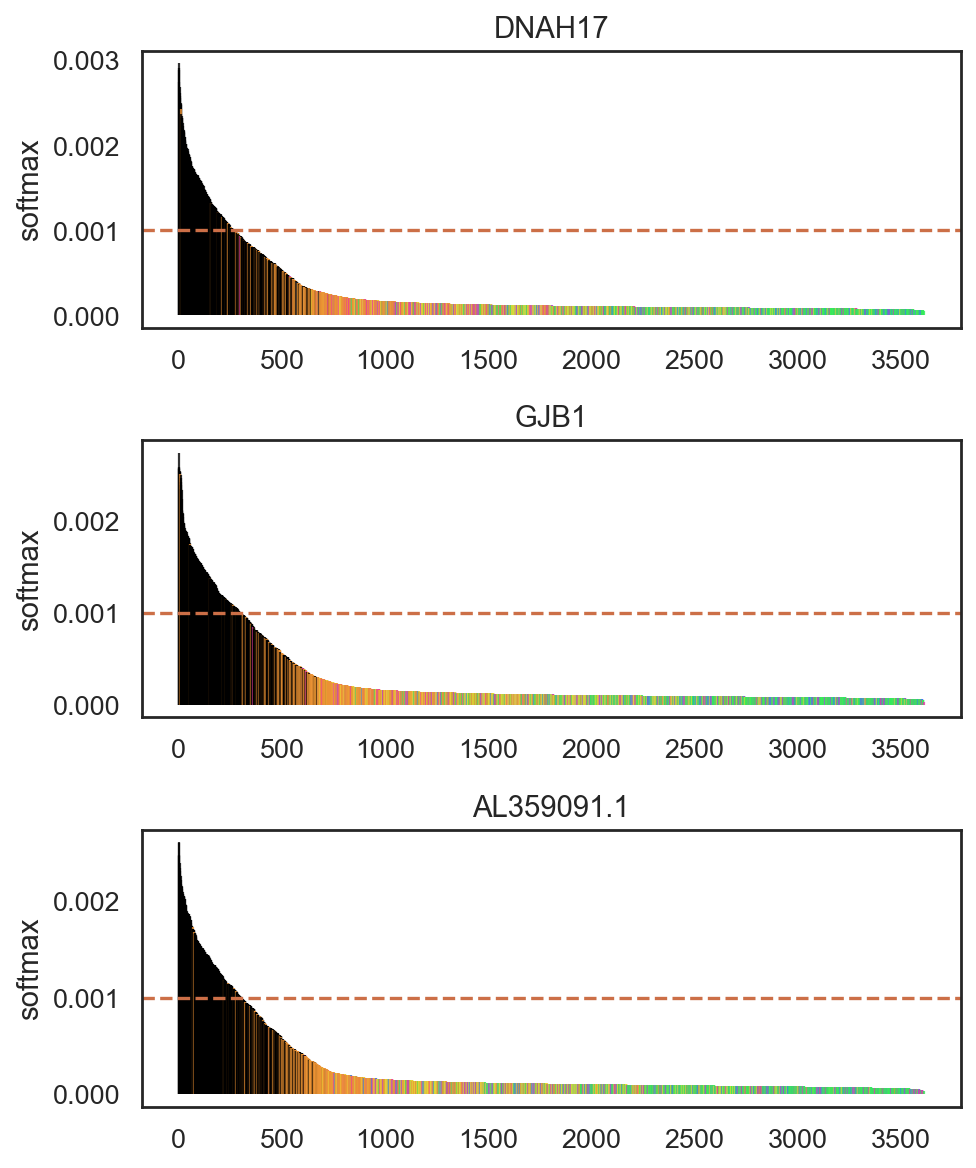

In [101]:
# add annoations of cells
adata_cmp.obs['spatialLIBD'] = adata_CG.obs.loc[adata_cmp.obs_names,'spatialLIBD']
si.pl.entity_barcode(adata_cmp,
                     layer='softmax',
                     entities=list_genes,
                     anno_ref='spatialLIBD',
                     show_cutoff=True,
                     cutoff=0.001,
                     palette=palette_celltype,
                     fig_size=(6, 2.5),
                     save_fig=False)

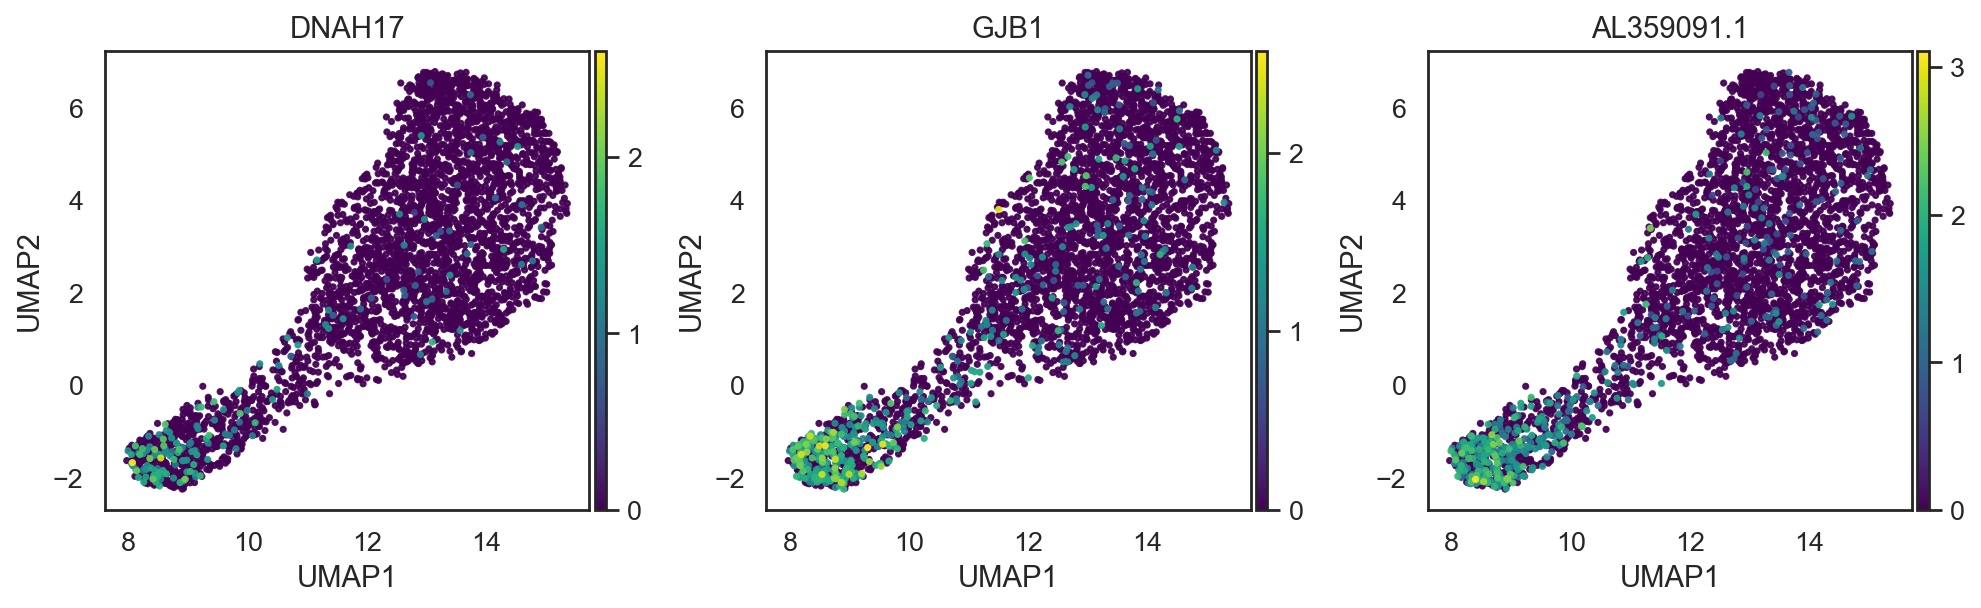

In [103]:
adata_CG.obsm['X_umap'] = adata_C[adata_CG.obs_names,].obsm['X_umap'].copy()
si.pl.umap(adata_CG,
           color=list_genes,
           drawing_order='sorted',
           size=5,
           alpha=0.9,
           fig_ncol=4,
           fig_size=(4,4),
           save_fig=False)

In [107]:
# find neighbor genes of a given gene on UMAP
query_result = si.tl.query(adata_all,
                           entity=['DNAH17'],
                           obsm='X_umap',
                           use_radius=False,
                           k=50,
                           anno_filter='entity_anno',
                           filters=['gene']
                           )
print(query_result.shape)
query_result.iloc[:10,]

(50, 5)


,spatialLIBD,id_dataset,entity_anno,distance,query
DNAH17,NaN,query_0,gene,0.000000,DNAH17
TMEM63A,NaN,query_0,gene,0.040687,DNAH17
NINJ2,NaN,query_0,gene,0.045361,DNAH17
LRP2,NaN,query_0,gene,0.059408,DNAH17
ABCA8,NaN,query_0,gene,0.078734,DNAH17
GJB1,NaN,query_0,gene,0.079510,DNAH17
AC092958.1,NaN,query_0,gene,0.079679,DNAH17
TP53TG5,NaN,query_0,gene,0.082470,DNAH17
CDC42EP1,NaN,query_0,gene,0.086303,DNAH17
AC093330.1,NaN,query_0,gene,0.086913,DNAH17


# Save data

In [108]:
adata_CG.write(os.path.join(workdir, 'adata_CG.h5ad'))
adata_C.write(os.path.join(workdir, 'adata_C.h5ad'))
adata_G.write(os.path.join(workdir, 'adata_G.h5ad'))
adata_all.write(os.path.join(workdir, 'adata_all.h5ad'))
adata_cmp.write(os.path.join(workdir, 'adata_cmp.h5ad'))